# Stats

In [29]:
%matplotlib inline

import seaborn as sns
import datetime as dt

from scipy import stats

sns.set()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [30]:
# Import data from CSV file and save in dataframe df

df = pd.read_csv(r"C:\Users\Adi\Desktop\Data_Science\Capstone1\DataSet_DataStory.csv")

In [31]:
df.head()

,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,year,day,month,duration,p_timesgoal,p_perbacker
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09 00:00:00,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95,2015,1,8,59.0,0.0,0
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01 00:00:00,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00,2017,5,9,60.0,8.0,161
2,Where is Hank?,Narrative Film,Film & Video,2013-02-26 00:00:00,2013-01-12 00:20:50,failed,3,US,220.0,45000.00,2013,5,1,45.0,0.0,73
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16 00:00:00,2012-03-17 03:24:11,failed,1,US,1.0,5000.00,2012,5,3,30.0,0.0,1
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29 00:00:00,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.00,2015,5,7,56.0,7.0,92


In [32]:
# Create dataframe for failed and successful campaigns only
data = df[(df.state == 'failed') | (df.state == 'successful')]

In [33]:
# Create result column
# Result value 1 for successful, 0 for failed campaigns

data['result'] = pd.get_dummies(data.state).successful

c:\miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [34]:
# Correlation matrix scatter plot

#from pandas.tools.plotting import scatter_matrix
#from matplotlib import cm
#feature_names = ['backers', 'usd_pledged_real', 'usd_goal_real', 'year', 'day', 'month', 'duration', 'p_timesgoal', 'p_perbacker']
#X = data[feature_names][:100]
#y = data['result'][:100]
#cmap = cm.get_cmap('gnuplot')

#scatter = pd.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(10,10), cmap = cmap)
#plt.suptitle('Scatter-matrix for each input variable')
#plt.show()
#plt.savefig('scatter_matrix')

In [35]:
# Create separate dataframe for failed and successful campaigns

f = df[df.state == 'failed']
s = df[df.state == 'successful']

In [36]:
# KS 2 sample test for duration
# Small pvalue signifies there difference in duration for failed and successful campaigns is statistically significant

stats.ks_2samp(f.duration.values, s.duration.values)

Ks_2sampResult(statistic=0.09900557408824556, pvalue=0.0)

In [37]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

In [38]:
# Sprearman correlation test between duration and result
# This is non parametric test since data is not normally distributed

stats.spearmanr(data.duration.values.reshape(-1, 1), data.result.values.reshape(-1, 1))

SpearmanrResult(correlation=-0.09520977739439622, pvalue=0.0)

In [39]:
# Sprearman correlation test between goal amount and result
# This is non parametric test since data is not normally distributed

stats.spearmanr(data.usd_goal_real.values.reshape(-1, 1), data.result.values.reshape(-1, 1))

SpearmanrResult(correlation=-0.22167805064920165, pvalue=0.0)

In [40]:
# Define function to pick the best distribution of passed data from the list of distributions provided

def get_best_distribution(data):
    dist_names = ["gamma", "lognorm", "norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme", "expon"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(stats, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = stats.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [41]:
# Checking distribution for duration
# This is for re assurance

get_best_distribution(data.duration.values)

p value for gamma = 0.0
p value for lognorm = 0.0
p value for norm = 0.0
p value for exponweib = 0.0
p value for weibull_max = 0.0
p value for weibull_min = 0.0


c:\miniconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


p value for pareto = 0.0
p value for genextreme = 0.0
p value for expon = 0.0
Best fitting distribution: gamma
Best p value: 0.0
Parameters for the best fit: (11.09420426583413, -6.744007396250721, 3.669693596237975)


('gamma', 0.0, (11.09420426583413, -6.744007396250721, 3.669693596237975))

In [42]:
# Checking distribution for goal amount
# This is for re assurance

get_best_distribution(data.usd_goal_real.values)

p value for gamma = 0.0
p value for lognorm = 0.0
p value for norm = 0.0
p value for exponweib = 0.0
p value for weibull_max = 0.0
p value for weibull_min = 0.0


c:\miniconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


p value for pareto = 0.0
p value for genextreme = 0.0
p value for expon = 0.0
Best fitting distribution: gamma
Best p value: 0.0
Parameters for the best fit: (0.001183762270934999, 166372354.61170137, 2.845057064315194e-16)


('gamma',
 0.0,
 (0.001183762270934999, 166372354.61170137, 2.845057064315194e-16))

In [43]:
# Null hypothesis: duration comes from same population for failed and successful projects
# Mann-Whitney U test

from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
# seed the random number generator
seed(1)
# generate two independent samples
data1 = s.duration.values
data2 = f.duration.values
# compare samples
stat, p = mannwhitneyu(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')


Statistics=11524324457.500, p=0.000
Different distribution (reject H0)


In [44]:
# Wilcoxon signed-rank test
# For learning purpose only. It does not apply here as data is not paired

#from numpy.random import seed
#from numpy.random import randn
#from scipy.stats import wilcoxon
# seed the random number generator
#seed(1)
# generate two independent samples
#data1 = s.duration.values
#data2 = f.duration.values
# compare samples
#stat, p = wilcoxon(data1, data2)
#print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
#alpha = 0.05
#if p > alpha:
#    print('Same distribution (fail to reject H0)')
#else:
#    print('Different distribution (reject H0)')

In [45]:
# Correlation matrix for entire dataframe

corr = data.corr()
corr

,backers,usd_pledged_real,usd_goal_real,year,day,month,duration,p_timesgoal,p_perbacker,result
backers,1.000000,0.752721,0.005198,0.019947,-0.029223,-0.002673,0.000016,0.016238,0.017579,0.125847
usd_pledged_real,0.752721,1.000000,0.006352,0.025291,-0.026826,-0.000232,0.008620,0.008905,0.093371,0.108412
usd_goal_real,0.005198,0.006352,1.000000,0.012201,-0.002551,0.001318,0.021328,-0.000432,0.013660,-0.023683
year,0.019947,0.025291,0.012201,1.000000,-0.033386,-0.091069,-0.171648,0.004520,0.006229,-0.073998
day,-0.029223,-0.026826,-0.002551,-0.033386,1.000000,-0.017698,0.019457,-0.000380,-0.006841,-0.021042
month,-0.002673,-0.000232,0.001318,-0.091069,-0.017698,1.000000,-0.017327,0.002779,0.013351,-0.010182
duration,0.000016,0.008620,0.021328,-0.171648,0.019457,-0.017327,1.000000,0.002740,0.021474,-0.115901
p_timesgoal,0.016238,0.008905,-0.000432,0.004520,-0.000380,0.002779,0.002740,1.000000,0.000513,0.014688
p_perbacker,0.017579,0.093371,0.013660,0.006229,-0.006841,0.013351,0.021474,0.000513,1.000000,0.155430
result,0.125847,0.108412,-0.023683,-0.073998,-0.021042,-0.010182,-0.115901,0.014688,0.155430,1.000000


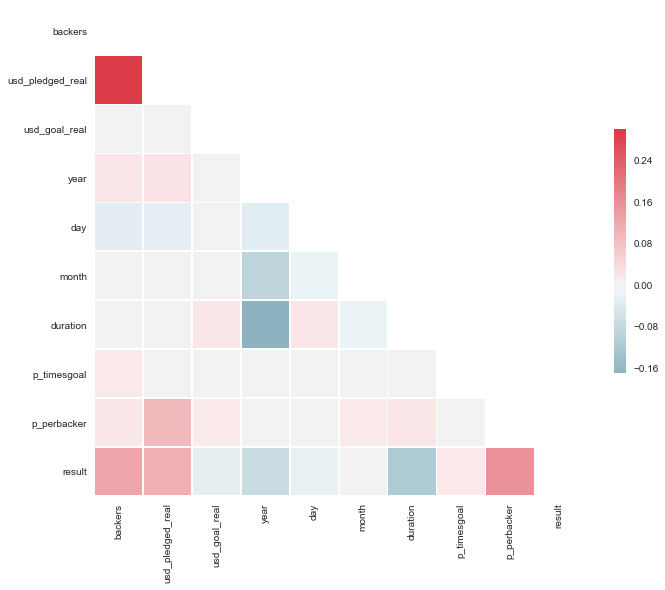

In [46]:
# Correlation heat map

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")


# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})